
# 项目：Research on the impact keys of the revenue based on more than 10k movies data info.

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>

## 简介
根据TMDb电影数据，分析如下：
1. 整理top 5 票房的电影，导演，电影类型
2. 每一年电影票房回报率

In [2]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import seaborn as sns
df= pd.read_csv("tmdb-movies.csv")
df_sorted=df.sort_values("revenue",ascending=False)


<a id='wrangling'></a>
## 数据整理
本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房。“演职人员 (cast)”、“电影类别 (genres)”等数据列包含由竖线字符（|）分隔的多个数值。“演职人员 (cast) ”列中有一些奇怪的字符。先不要清洁它们，你可以保持原样，不去管它们。以“_adj”结尾的最后两列表示了考虑了通货膨胀之后的相关电影的预算和收入（以2010年美元的价值来计算）。
### 常规属性

In [3]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df_sorted.head(1)
df_sorted.isnull().sum()
df_sorted.duplicated().sum()
df_sorted=df_sorted[(df_sorted.budget> 10) & (df_sorted.revenue>10) & ( df_sorted.vote_count >10)]
#sns.countplot(x="vote_count", data=df_sorted)#check the count for each value in every column

Drop null and duplicate values

In [4]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。
df_sorted.dropna(inplace=True)
df_sorted.isnull().sum()
df_sorted.drop_duplicates(inplace=True)
df_sorted.describe()


id   popularity        budget       revenue      runtime  \
count    1284.000000  1284.000000  1.284000e+03  1.284000e+03  1284.000000   
mean    52466.742991     1.789423  5.211137e+07  1.766508e+08   110.320872   
std     74456.741673     2.173508  5.516313e+07  2.539726e+08    18.807384   
min        11.000000     0.010335  3.000000e+01  4.600000e+01    63.000000   
25%      5819.000000     0.671120  1.400000e+07  2.603179e+07    97.000000   
50%     20021.500000     1.155174  3.200000e+07  8.225877e+07   107.000000   
75%     62207.750000     2.129068  7.000000e+07  2.143081e+08   121.000000   
max    333348.000000    32.985763  4.250000e+08  2.781506e+09   201.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  1284.000000   1284.000000   1284.000000  1.284000e+03  1.284000e+03  
mean    949.408879      6.279517   2007.007009  5.474482e+07  1.996377e+08  
std    1256.158752      0.795903      8.066990  5.526669e+07  2.970452e+08  
min      11.000000      2.200000   1961.000000  5.006696e+01  4.837675e+01  
25%     180.000000      5.800000   2005.000000  1.519180e+07  2.803080e+07  
50%     440.000000      6.300000   2009.000000  3.557402e+07  8.765262e+07  
75%    1175.500000      6.800000   2011.000000  7.639483e+07  2.354261e+08  
max    9767.000000      8.300000   2015.000000  4.250000e+08  2.827124e+09

(260000000.0, 400000000.0)

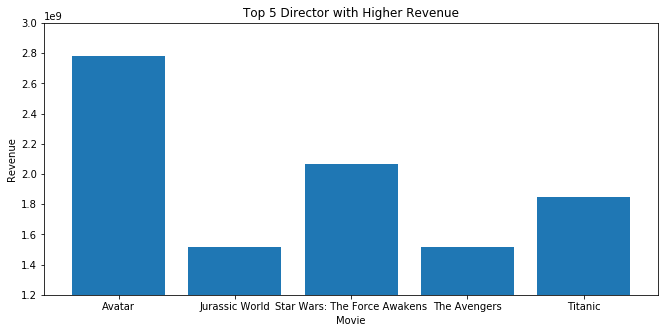

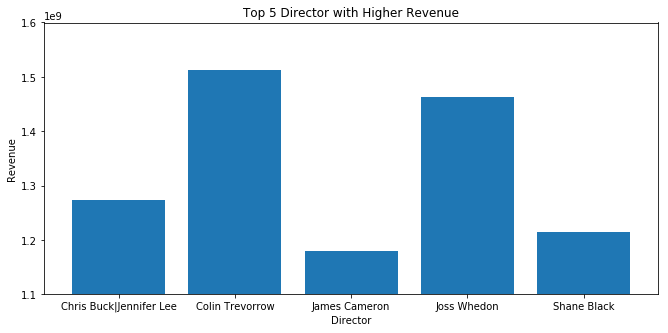

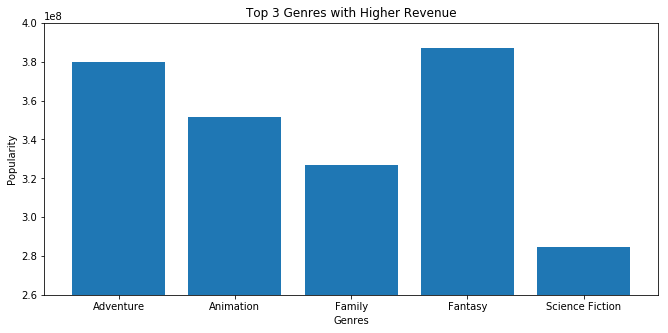

In [22]:
#top 5 movie
df_groupbyMovie=df_sorted.groupby('original_title').revenue.mean().sort_values(ascending=False)
df_groupbyMovie=df_groupbyMovie.head(5)
plt.subplots(figsize=(11, 5))
plt.bar(df_groupbyMovie.index, df_groupbyMovie)
plt.title('Top 5 Director with Higher Revenue')
plt.xlabel('Movie')
plt.ylabel('Revenue');
plt.ylim([1.2e9,3e9])

#top 5 director
df_groupbyCompany=df_sorted.groupby('director').revenue.mean().sort_values(ascending=False)
df_groupbyCompany=df_groupbyCompany.head(5)
plt.subplots(figsize=(11, 5))
plt.bar(df_groupbyCompany.index, df_groupbyCompany)
plt.title('Top 5 Director with Higher Revenue')
plt.xlabel('Director')
plt.ylabel('Revenue');
plt.ylim([1.1e9,1.6e9])

#top 5 genres
#因为每个电影有众多类型，我们将类型分离
df_clean = df_sorted[df_sorted['genres'].notna()]
df_cleanGenres = df_clean.drop('genres', axis=1).join(df_clean['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df_groupbyGenres=df_cleanGenres.groupby('genres').revenue.mean().sort_values(ascending=False)
df_groupbyGenres=df_groupbyGenres.head(5)

plt.subplots(figsize=(11, 5))
plt.bar(df_groupbyGenres.index, df_groupbyGenres)
plt.title('Top 3 Genres with Higher Revenue')
plt.xlabel('Genres')
plt.ylabel('Popularity');
plt.ylim([2.6e8,4e8])

#df_groupbyMovie.head(5)
#df_groupbyCompany.head(5)
#df_groupbyGenres.head(5)

### 研究问题 2（the research for the relationship between the popularity and the release year）

count     51.000000
mean      46.817253
std       47.894544
min     -127.272727
25%       20.997112
50%       51.887316
75%       87.124386
max       98.828267
Name: Revenue_propotion, dtype: float64

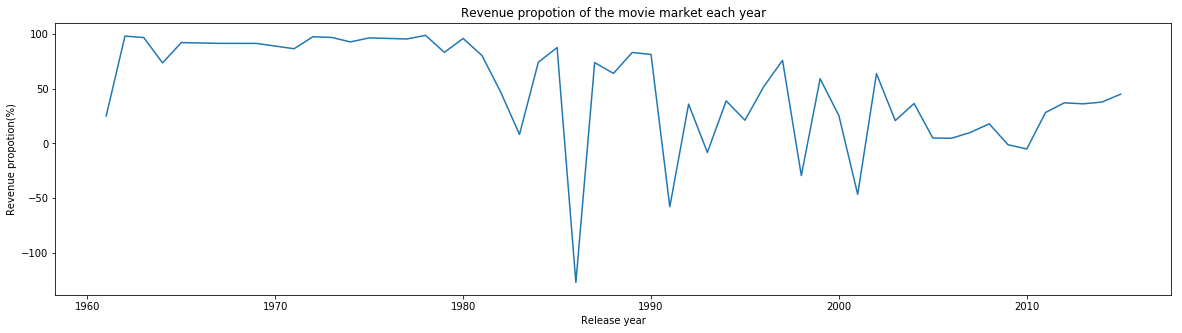

In [8]:
df_sorted["Revenue_propotion"]=(df_sorted.revenue-df_sorted.budget)/df_sorted.revenue*100
df_sorted=df_sorted[(abs(df_sorted.Revenue_propotion)< 1000)]
df_year_revenue=df_sorted.groupby('release_year').Revenue_propotion.mean()
plt.subplots(figsize=(20, 5))
df_year_revenue.plot();
plt.title("Revenue propotion of the movie market each year")
plt.xlabel("Release year")
plt.ylabel("Revenue propotion(%)")
#df_year_revenue               
df_year_revenue.describe()


<a id='conclusions'></a>
## 结论
研究问题1:Top 5 with higher revenue


统计出从1960年到2015年，票房最高的电影、导演和电源类型。这里根据票房的高低，这里分别对电影名字，导演，电源类型做了三次排序。去除的异常值相较于样本数目不多，不会对结果产生太大的影响。以下为结果，柱状图如上：

Result:
1. Top 5 movie with higher revenue
Avatar             
Star Wars: The Force Awakens  
Titanic                       
The Avengers                  
Jurassic World                

2. Top 5 director with higher revenue
Colin Trevorrow           
Joss Whedon               
Chris Buck|Jennifer Lee   
Shane Black               
James Cameron


3. Top 5 Genres with higher revenue
Fantasy           
Adventure         
Animation         
Family            
Science Fiction        

研究问题2:Revenue propotion of the movie market each year:


这里票房回报率以（票房-拍摄成本）/票房*100% 来计算。这个研究对象只基于当时票房，成本，发行时间，没有考虑通货膨胀和其他因素的影响。去除的异常值相较于样本数，不会对结果产生太大的影响。电影回报率最低的数据是在1986年，为-127.2727% ，最高的在1978年，为98.8283%。另外每一年收集有效电影数据得越多，这一年的整体电影市场票房回报率越有代表性。


From the plot of the revenue of movies each year, the lowest is -127.2727% of the year 1986 and the highest is 98.8283% of the year 1978.
If there are more movie infomation collected from 1960 to 2015, the result will be more completed.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])


255